In [1]:
import pandas as pd

import seaborn
import plotly
import ggplot

import numpy as np
import matplotlib
    

In [2]:
DF = pd.read_csv('nba/players.csv')
nba_players = DF.iloc[:,1:]

In [3]:
nba_players.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [4]:
nba_players.describe()


,height,weight,born
count,3921.000000,3921.000000,3921.00000
mean,198.704922,94.783219,1962.37975
std,9.269761,12.039515,20.33491
min,160.000000,60.000000,1913.00000
25%,190.000000,86.000000,1948.00000
50%,198.000000,95.000000,1964.00000
75%,206.000000,102.000000,1979.00000
max,231.000000,163.000000,1997.00000


In [5]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), object(4)
memory usage: 214.6+ KB


In [6]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 11,6

Populating the interactive namespace from numpy and matplotlib


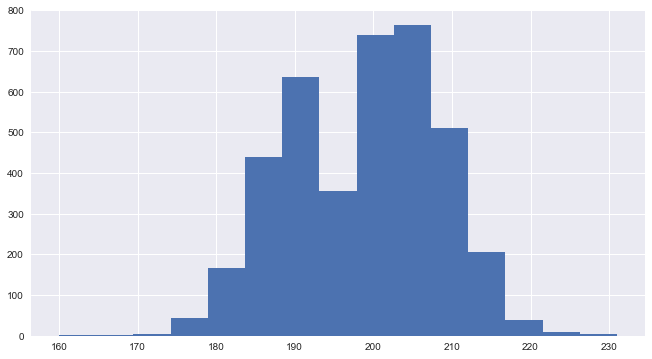

In [7]:
# график показывает распределение роста по игрокам NBA. Очевидный выбор - гистограмма, переменные - рост и 
# количество игроков в оответствующем диапазоне.

# На графике видно, что есть определенный сегмент, представленный в NBA меньше, чем "соседние" - от 190 до 200 см.
# Гипотеза: до 190 в игроках ценится скорость и маневренность - потенциальные плеймейкеры,
# более 200 - важны физические параметры, мощь игрока, рост для защиты своего кольца. 
height_hist = nba_players.height.hist(bins = 15, grid=1)

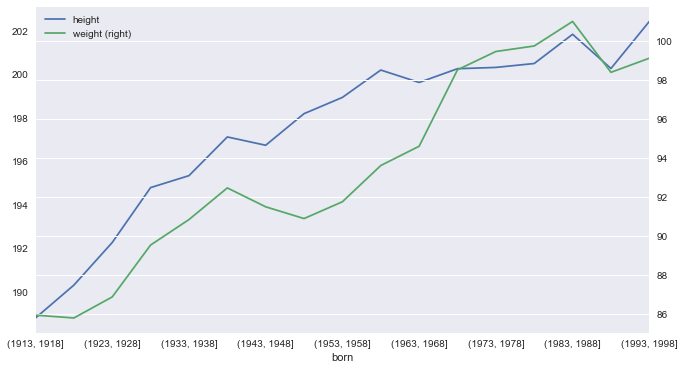

In [8]:
groupped_by_born = nba_players[['born']+['height']+['weight']].\
groupby(pd.cut(nba_players['born'], np.arange(1913, 2000, 5))).\
mean()
groupped_by_born.iloc[:,1:].plot(secondary_y=['weight'])

# график показывает изменение роста и веса игроков NBA с начала прошлого столетия. Переменные - год рождения, рост, вес игрока.
# На графике видно, что есть очевидная динамика 
# на увеличение как роста игроков - средний рост со 190 в 1913-1918 до 202 в 1993-1998,
# так и веса баскетболистов - от 86 до 99 кг.
# Гипотеза: программы тренировок, стартующие с самого раннего возраста частично способствуют формированию 
# необходимых для игры физических параметров


In [9]:
nba_stats = pd.read_csv('nba/Seasons_Stats.csv')

In [10]:
nba_stats.describe()


,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [11]:
nba_stats.head(15)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [12]:
nba_total_average = nba_stats[['Player']+['PTS']].groupby(['Player']).agg(['sum', 'count'])


In [13]:
nba_total_average.columns = nba_total_average.columns.get_level_values(1)
nba_total_average.head(15)


,sum,count
Player,,
A.C. Green,12928.0,18
A.J. Bramlett,8.0,1
A.J. English,1502.0,2
A.J. Guyton,442.0,3
A.J. Hammons,48.0,1
A.J. Price,1656.0,9
A.J. Wynder,12.0,1
A.W. Holt,4.0,1
Aaron Brooks,7839.0,15


In [14]:
import seaborn as sns

data1 = pd.DataFrame(np.random.randn(6,4), columns=list('ABCD'))


data1

,A,B,C,D
0,-1.003460,-0.048032,0.325070,-1.073868
1,-0.937400,0.128973,1.620113,0.259811
2,-1.493753,0.293329,-1.651850,1.065967
3,0.188238,-0.869341,-0.630079,-0.086121
4,1.345029,-1.078272,-1.265116,-0.154328
5,1.126129,-0.974486,-0.733690,-1.005564


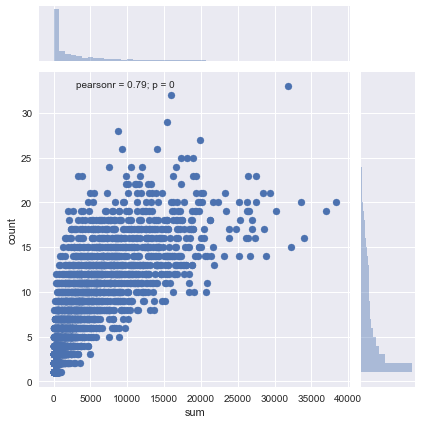

In [15]:
# переменные - количество сезонов, сыгранных в NBA и количество заработанных очков за все сезоны
# на графике видно, что большая часть находится выше оси x=y. Чем выше и левее игрок, тем меньше он зарабатывал очков 
# и больше сезонов сыграл, т.е. средняя результативность за сезон снижается
# видны и аутлейеры - игроки, которые провели до 20 сезонов, но заработавшие максимальные значения количества очков

sns.jointplot(x='sum',y='count',data=nba_total_average, kind='scatter');

In [16]:
oldies_scoring = nba_stats[['Age']+['PTS']]


In [17]:
oldies_scoring.head(15)

,Age,PTS
0,31.0,458.0
1,29.0,279.0
2,25.0,438.0
3,24.0,63.0
4,24.0,59.0
5,24.0,4.0
6,22.0,895.0
7,23.0,10.0
8,28.0,661.0
9,28.0,382.0


In [18]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [19]:
data = []

for age in oldies_scoring.Age.unique():
    data.append(go.Box(y=oldies_scoring[oldies_scoring.Age==age].PTS, name=age))
iplot(data, show_link = False)

#представлено распределение со статистикой в зависимости от возраста.
# Видно, что пик по среднему количеству очков достигается в 29 лет
# при этом рекорды за сезон были поставлены 25 и 26 летними игроками.
# наибольший разброс наблюдается у 28-летних игроков.

In [20]:
import ggplot

In [21]:
# total_pts_per_season = nba_stats[['Year']+['PTS']].groupby(['Year']).sum()

total_pts_per_season = nba_stats.groupby('Year', as_index = False)[['PTS']].sum()

In [22]:
total_pts_per_season.head(15)

,Year,PTS
0,1950.0,103562.0
1,1951.0,65338.0
2,1952.0,58096.0
3,1953.0,64356.0
4,1954.0,55252.0
5,1955.0,55253.0
6,1956.0,59768.0
7,1957.0,59654.0
8,1958.0,63093.0
9,1959.0,67031.0


In [36]:
total_number_of_clubs = nba_stats[['Year']+['Player']+["Tm"]].groupby('Year').Tm.nunique()
total_number_of_clubs.head(50)

Year
1950.0    18
1951.0    12
1952.0    11
1953.0    11
1954.0    10
1955.0    10
1956.0     9
1957.0     9
1958.0     9
1959.0     9
1960.0     9
1961.0     9
1962.0    10
1963.0    10
1964.0    10
1965.0    10
1966.0    10
1967.0    11
1968.0    13
1969.0    15
1970.0    15
1971.0    18
1972.0    18
1973.0    18
1974.0    18
1975.0    19
1976.0    19
1977.0    23
1978.0    23
1979.0    23
1980.0    23
1981.0    24
1982.0    24
1983.0    24
1984.0    24
1985.0    24
1986.0    24
1987.0    24
1988.0    24
1989.0    26
1990.0    28
1991.0    28
1992.0    28
1993.0    28
1994.0    28
1995.0    28
1996.0    30
1997.0    30
1998.0    30
1999.0    30
Name: Tm, dtype: int64

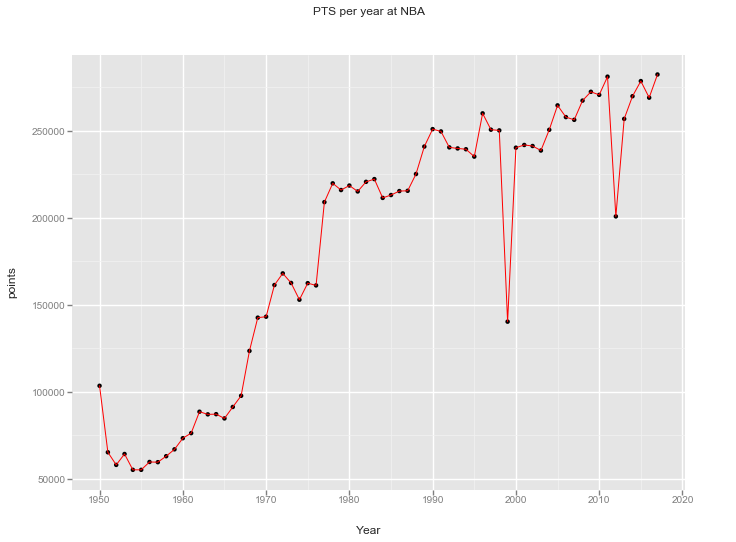

<ggplot: (160209336496)>


In [199]:
chart = ggplot.ggplot(ggplot.aes(x='Year', y='PTS'),data = total_pts_per_season)\
+ggplot.geom_point()\
+ggplot.xlab('Year')\
+ggplot.ylab('points')+ggplot.geom_line(color='r')+ggplot.ggtitle('PTS per year at NBA')\
+
print(chart)

In [ ]:
# На графике выше отображена график роста количества заработанных очков во всей лиге с течением времени
# Мне кажется, такие результаты обеспечены в основном за счет роста количества клубов, но не могу понять, 
# как сгруппировать по годам и расчитать количество уникальных значений...Буду рад совету!